In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re



In [4]:
np.load("aggregated_results/input_dim_1_False_adam.npy", allow_pickle=True).item()

{'min_distance': array([0.48474522, 0.59245599, 0.04135986, ..., 0.42922918, 0.43740714,
        0.36666913]),
 'max_distance': array([0.48474522, 0.59245599, 0.04135986, ..., 0.42922918, 0.43740714,
        0.36666913]),
 'model_0_perturbations': array([0.17063367, 0.15097953, 0.26663274, ..., 0.38151515, 0.37938225,
        0.3978316 ], dtype=float32),
 'model_1_perturbations': array([0.11458999, 0.11458999, 0.27255318, ..., 0.19369859, 0.19369859,
        0.19369857], dtype=float32),
 'model_2_perturbations': array([0.04929686, 0.05016682, 0.06379963, ..., 0.64637417, 0.646503  ,
        0.6452742 ], dtype=float32),
 'model_3_perturbations': array([0.17651485, 0.17651485, 0.17651485, ..., 0.69328433, 0.69328433,
        0.69328433], dtype=float32),
 'model_4_perturbations': array([0.00884086, 0.00128512, 0.13666269, ..., 0.08500307, 0.07690521,
        0.16786045], dtype=float32),
 'model_5_perturbations': array([0.17651485, 0.17651485, 0.17651485, ..., 0.69328433, 0.69328433,
     

In [5]:
np.load("aggregated_results/input_dim_1_False_sgd.npy", allow_pickle=True).item()

{'min_distance': array([0.48474522, 0.59245599, 0.04135986, ..., 0.42922918, 0.43740714,
        0.36666913]),
 'max_distance': array([0.48474522, 0.59245599, 0.04135986, ..., 0.42922918, 0.43740714,
        0.36666913]),
 'model_0_perturbations': array([0.17063367, 0.15097953, 0.26663274, ..., 0.38151515, 0.37938225,
        0.3978316 ], dtype=float32),
 'model_1_perturbations': array([0.11458999, 0.11458999, 0.27255318, ..., 0.19369859, 0.19369859,
        0.19369857], dtype=float32),
 'model_2_perturbations': array([0.04929686, 0.05016682, 0.06379963, ..., 0.64637417, 0.646503  ,
        0.6452742 ], dtype=float32),
 'model_3_perturbations': array([0.17651485, 0.17651485, 0.17651485, ..., 0.69328433, 0.69328433,
        0.69328433], dtype=float32),
 'model_4_perturbations': array([0.00884086, 0.00128512, 0.13666269, ..., 0.08500307, 0.07690521,
        0.16786045], dtype=float32),
 'model_5_perturbations': array([0.17651485, 0.17651485, 0.17651485, ..., 0.69328433, 0.69328433,
     

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re

def load_all_aggregated_data() -> dict:
    """Load all aggregated data for various configurations: input dimensions, pseudo rehearsal, and optimizer.
    
    Returns:
    - all_data (dict): A nested dictionary with keys as input dimensions, pseudorehearsal, and optimizer 
                       and values as the loaded data.
    """
    all_data = {}
    save_folder = "aggregated_results"
    
    # Get all files in the folder with the .npy extension
    files = [f for f in os.listdir(save_folder) if f.endswith(".npy")]

    # Extract the configuration details from the file name using regex
    pattern = re.compile(r"input_dim_(\d+)_(True|False)_(\w+).npy")

    for file in files:
        match = pattern.match(file)
        if match:
            dim = int(match.group(1))
            pseudo_rehearsal = True if match.group(2) == 'True' else False
            optimizer = match.group(3)
            
            if dim not in all_data:
                all_data[dim] = {}
            
            if pseudo_rehearsal not in all_data[dim]:
                all_data[dim][pseudo_rehearsal] = {}
            
            save_path = os.path.join(save_folder, file)
            data = np.load(save_path, allow_pickle=True).item()
            all_data[dim][pseudo_rehearsal][optimizer] = data

    return all_data 

def get_perturbation_labels(output_dim: int = 1,
                            hidden_units_wide: int = 1000,
                            hidden_units_deep: int = 16,
                            hidden_layers: int = 8,
                            num_exps: int = 6) -> dict:
    """Generate dictionary of perturbation labels with given configurations."""
    
    model_descriptions = [
        'Linear Model',
        f"Wide ReLU ANN",
        f"Deep ReLU ANN",
        'One Parameter'
    ]

    for partition_num in [1, 2, 4, 8, 10]:
        model_descriptions.extend([
            f"Spline ANN (z={partition_num})",
            f"Lookup Table (z={partition_num})",
            f"ABEL-Spline (z={partition_num})"
        ])

    # Model perturbation labels
    perturbation_labels = {f"model_{i}_perturbations": desc for i, desc in enumerate(model_descriptions)}
    
    # Adding the distance labels
    perturbation_labels["min_distance"] = "Min Absolute Difference"
    perturbation_labels["max_distance"] = "Max Absolute Difference"

    return perturbation_labels

def create_nested_dataframe_dict(loaded_data_dict: dict) -> dict:
    """Create a nested dictionary of pandas DataFrames using loaded data."""
    return {
        dim: {
            pseudo: {
                optimizer: pd.DataFrame(data)
                for optimizer, data in optimizer_data.items()
            }
            for pseudo, optimizer_data in pseudo_rehearsal_data.items()
        }
        for dim, pseudo_rehearsal_data in loaded_data_dict.items()
    }


# Example usage:
perturbation_labels_dict = get_perturbation_labels()
for key, value in perturbation_labels_dict.items():
    print(f"{key} -> {value}")

# Example usage:
loaded_data_dict = load_all_aggregated_data()
#for dim, pseudo_rehearsal_data in loaded_data_dict.items():
#    for pseudo, optimizer_data in pseudo_rehearsal_data.items():
#        for optimizer, data in optimizer_data.items():
#            print(f"Data for dimension {dim}, pseudorehearsal: {pseudo}, 
# optimizer: {optimizer} has keys: \n\n {data.keys()} \n\n")

# Example usage:
df_dict = create_nested_dataframe_dict(loaded_data_dict)

model_0_perturbations -> Linear Model
model_1_perturbations -> Wide ReLU ANN
model_2_perturbations -> Deep ReLU ANN
model_3_perturbations -> One Parameter
model_4_perturbations -> Spline ANN (z=1)
model_5_perturbations -> Lookup Table (z=1)
model_6_perturbations -> ABEL-Spline (z=1)
model_7_perturbations -> Spline ANN (z=2)
model_8_perturbations -> Lookup Table (z=2)
model_9_perturbations -> ABEL-Spline (z=2)
model_10_perturbations -> Spline ANN (z=4)
model_11_perturbations -> Lookup Table (z=4)
model_12_perturbations -> ABEL-Spline (z=4)
model_13_perturbations -> Spline ANN (z=8)
model_14_perturbations -> Lookup Table (z=8)
model_15_perturbations -> ABEL-Spline (z=8)
model_16_perturbations -> Spline ANN (z=10)
model_17_perturbations -> Lookup Table (z=10)
model_18_perturbations -> ABEL-Spline (z=10)
min_distance -> Min Absolute Difference
max_distance -> Max Absolute Difference


In [2]:
df_dict[1][False]['adam']

,min_distance,max_distance,model_0_perturbations,model_1_perturbations,model_2_perturbations,model_3_perturbations,model_4_perturbations,model_5_perturbations,model_6_perturbations,model_7_perturbations,...,model_9_perturbations,model_10_perturbations,model_11_perturbations,model_12_perturbations,model_13_perturbations,model_14_perturbations,model_15_perturbations,model_16_perturbations,model_17_perturbations,model_18_perturbations
0,0.484745,0.484745,0.170634,0.114590,0.049297,0.176515,0.008841,0.176515,0.007420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.592456,0.592456,0.150980,0.114590,0.050167,0.176515,0.001285,0.176515,0.001079,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.041360,0.041360,0.266633,0.272553,0.063800,0.176515,0.136663,0.176515,0.115096,0.160294,...,0.106229,0.138143,0.155912,0.112576,0.048203,0.190068,0.059229,0.026041,0.16659,0.028263
3,0.337331,0.337331,0.197533,0.114590,0.049683,0.176515,0.038115,0.176515,0.032003,0.000368,...,0.000241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.139769,0.139769,0.233582,0.240307,0.059419,0.176515,0.103859,0.176515,0.087359,0.073844,...,0.049355,0.004670,0.155912,0.003819,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.089772,0.089772,0.516877,0.463439,0.718330,0.693284,0.695416,0.693284,0.699522,0.472432,...,0.482121,0.185713,0.736574,0.165786,0.001337,0.671341,0.001406,0.000000,0.00000,0.000000
149996,0.227712,0.227712,0.434073,0.215433,0.633107,0.693284,0.440280,0.693284,0.425706,0.061661,...,0.062143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
149997,0.429229,0.429229,0.381515,0.193699,0.646374,0.693284,0.085003,0.693284,0.081259,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
149998,0.437407,0.437407,0.379382,0.193699,0.646503,0.693284,0.076905,0.693284,0.073531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [33]:
df_dict[1][False]['sgd']

,min_distance,max_distance,model_0_perturbations,model_1_perturbations,model_2_perturbations,model_3_perturbations,model_4_perturbations,model_5_perturbations,model_6_perturbations,model_7_perturbations,...,model_9_perturbations,model_10_perturbations,model_11_perturbations,model_12_perturbations,model_13_perturbations,model_14_perturbations,model_15_perturbations,model_16_perturbations,model_17_perturbations,model_18_perturbations
0,0.484745,0.484745,0.170634,0.114590,0.049297,0.176515,0.008841,0.176515,0.007420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.592456,0.592456,0.150980,0.114590,0.050167,0.176515,0.001285,0.176515,0.001079,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.041360,0.041360,0.266633,0.272553,0.063800,0.176515,0.136663,0.176515,0.115096,0.160294,...,0.106229,0.138143,0.155912,0.112576,0.048203,0.190068,0.059229,0.026041,0.16659,0.028263
3,0.337331,0.337331,0.197533,0.114590,0.049683,0.176515,0.038115,0.176515,0.032003,0.000368,...,0.000241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.139769,0.139769,0.233582,0.240307,0.059419,0.176515,0.103859,0.176515,0.087359,0.073844,...,0.049355,0.004670,0.155912,0.003819,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.089772,0.089772,0.516877,0.463439,0.718330,0.693284,0.695416,0.693284,0.699522,0.472432,...,0.482121,0.185713,0.736574,0.165786,0.001337,0.671341,0.001406,0.000000,0.00000,0.000000
149996,0.227712,0.227712,0.434073,0.215433,0.633107,0.693284,0.440280,0.693284,0.425706,0.061661,...,0.062143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
149997,0.429229,0.429229,0.381515,0.193699,0.646374,0.693284,0.085003,0.693284,0.081259,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
149998,0.437407,0.437407,0.379382,0.193699,0.646503,0.693284,0.076905,0.693284,0.073531,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [3]:
import pandas as pd

# Assuming you have df_dict and the mapping between keys and labels
df = df_dict[1][False]['adam']

# Define a mapping of keys to labels
key_label_mapping = {
    'model_0_perturbations': 'Linear Model',
    'model_1_perturbations': 'Wide ReLU ANN',
    'model_2_perturbations': 'Deep ReLU ANN',
    'model_3_perturbations': 'One Parameter',
    'model_4_perturbations': 'Spline ANN (z=1)',
    'model_5_perturbations': 'Lookup Table (z=1)',
    'model_6_perturbations': 'ABEL-Spline (z=1)',
    'model_7_perturbations': 'Spline ANN (z=2)',
    'model_8_perturbations': 'Lookup Table (z=2)',
    'model_9_perturbations': 'ABEL-Spline (z=2)',
    'model_10_perturbations': 'Spline ANN (z=4)',
    'model_11_perturbations': 'Lookup Table (z=4)',
    'model_12_perturbations': 'ABEL-Spline (z=4)',
    'model_13_perturbations': 'Spline ANN (z=8)',
    'model_14_perturbations': 'Lookup Table (z=8)',
    'model_15_perturbations': 'ABEL-Spline (z=8)',
    'model_16_perturbations': 'Spline ANN (z=10)',
    'model_17_perturbations': 'Lookup Table (z=10)',
    'model_18_perturbations': 'ABEL-Spline (z=10)'
}

# Calculate mean absolute perturbation for each model
mean_perturbations = {key_label_mapping[key]: df[key].abs().mean() for key in key_label_mapping}

# Store results in LaTeX format
with open("mean_perturbations.tex", "w") as f:
    f.write("\\begin{table}\n")
    f.write("\\begin{tabular}{|l|c|}\n")
    f.write("\\hline\n")
    f.write("Model & Mean Absolute Perturbation \\\\ \\hline\n")
    for model, value in mean_perturbations.items():
        f.write(f"{model} & {value:.4f} \\\\ \\hline\n")
    f.write("\\end{tabular}\n")
    f.write("\\end{table}\n")


In [4]:
import pandas as pd

# Define the list of input dimensions you want to consider
dimensions = [1, 2, 3, 4, 5, 6]

# Calculate mean absolute perturbations for each model across the specified dimensions
mean_perturbations_by_dim = {}
for dim in dimensions:
    df = df_dict[dim][False]['adam']
    mean_perturbations_by_dim[dim] = {key_label_mapping[key]: df[key].abs().mean() for key in key_label_mapping}

# Find the minimum value for bold formatting
min_value = min(val for dim_data in mean_perturbations_by_dim.values() for val in dim_data.values())

# Store results in LaTeX format with different dimensions as different columns
with open("mean_perturbations.tex", "w") as f:
    f.write("\\begin{table}\n")
    f.write("\\begin{tabular}{|l|" + "c|"*len(dimensions) + "}\n")
    f.write("\\hline\n")
    
    # Header
    f.write("Model & " + " & ".join([f"Dim {dim}" for dim in dimensions]) + " \\\\ \\hline\n")
    
    # Each model's data
    for model_key, model_label in key_label_mapping.items():
        f.write(model_label)
        for dim in dimensions:
            value = mean_perturbations_by_dim[dim][model_label]
            # Check if the value is the minimum and apply bold formatting
            if value == min_value:
                f.write(f" & \\textbf{{{value:.4f}}}")
            else:
                f.write(f" & {value:.4f}")
        f.write(" \\\\ \\hline\n")
    
    f.write("\\end{tabular}\n")
    f.write("\\end{table}\n")


In [5]:
import pandas as pd

# Define the list of input dimensions you want to consider
dimensions = [1, 2, 3, 4, 5, 6]

new_key_label_mapping = {
    'model_3_perturbations': 'One Parameter',
    'model_2_perturbations': 'Deep ReLU ANN',
    'model_0_perturbations': 'Linear Model',
    'model_1_perturbations': 'Wide ReLU ANN',
    'model_4_perturbations': 'Spline ANN (z=1)',
    'model_7_perturbations': 'Spline ANN (z=2)',
    'model_10_perturbations': 'Spline ANN (z=4)',
    'model_13_perturbations': 'Spline ANN (z=8)',
    'model_16_perturbations': 'Spline ANN (z=10)',
    'model_6_perturbations': 'ABEL-Spline (z=1)',
    'model_9_perturbations': 'ABEL-Spline (z=2)',
    'model_12_perturbations': 'ABEL-Spline (z=4)',
    'model_15_perturbations': 'ABEL-Spline (z=8)',
    'model_18_perturbations': 'ABEL-Spline (z=10)',
    'model_5_perturbations': 'Lookup Table (z=1)',
    'model_8_perturbations': 'Lookup Table (z=2)',
    'model_11_perturbations': 'Lookup Table (z=4)',
    'model_14_perturbations': 'Lookup Table (z=8)',
    'model_17_perturbations': 'Lookup Table (z=10)',
}


# Calculate mean absolute perturbations for each model across the specified dimensions
mean_perturbations_by_dim = {}
for dim in dimensions:
    df = df_dict[dim][False]['adam']
    mean_perturbations_by_dim[dim] = {new_key_label_mapping[key]: df[key].abs().mean() for key in new_key_label_mapping}

# Find the minimum value for each dimension (column) for bold formatting
min_values_by_dim = {dim: min(dim_data.values()) for dim, dim_data in mean_perturbations_by_dim.items()}

# Store results in LaTeX format with different dimensions as different columns
with open("mean_perturbations.tex", "w") as f:
    f.write("\\begin{table}\n")
    f.write("\\begin{tabular}{|l|" + "c|"*len(dimensions) + "}\n")
    f.write("\\hline\n")
    
    # Header
    f.write("Model & " + " & ".join([f"Dim {dim}" for dim in dimensions]) + " \\\\ \\hline\n")
    
    # Each model's data
    for model_key, model_label in new_key_label_mapping.items():
        f.write(model_label)
        for dim in dimensions:
            value = mean_perturbations_by_dim[dim][model_label]
            # Check if the value is the minimum for that dimension and apply bold formatting
            if value == min_values_by_dim[dim]:
                f.write(f" & \\textbf{{{value:.4f}}}")
            else:
                f.write(f" & {value:.4f}")
        f.write(" \\\\ \\hline\n")
    
    f.write("\\end{tabular}\n")
    f.write("\\end{table}\n")


In [6]:
def save_latex_table(df_dict, optimizer_choice='adam', pseudo_rehears_choice=False):
    
    # Dictionary mapping keys to labels
    key_label_mapping = {
    'model_3_perturbations': 'One Parameter',
    'model_2_perturbations': 'Deep ReLU ANN',
    'model_0_perturbations': 'Linear Model',
    'model_1_perturbations': 'Wide ReLU ANN',
    'model_4_perturbations': 'Spline ANN (z=1)',
    'model_7_perturbations': 'Spline ANN (z=2)',
    'model_10_perturbations': 'Spline ANN (z=4)',
    'model_13_perturbations': 'Spline ANN (z=8)',
    'model_16_perturbations': 'Spline ANN (z=10)',
    'model_6_perturbations': 'ABEL-Spline (z=1)',
    'model_9_perturbations': 'ABEL-Spline (z=2)',
    'model_12_perturbations': 'ABEL-Spline (z=4)',
    'model_15_perturbations': 'ABEL-Spline (z=8)',
    'model_18_perturbations': 'ABEL-Spline (z=10)',
    'model_5_perturbations': 'Lookup Table (z=1)',
    'model_8_perturbations': 'Lookup Table (z=2)',
    'model_11_perturbations': 'Lookup Table (z=4)',
    'model_14_perturbations': 'Lookup Table (z=8)',
    'model_17_perturbations': 'Lookup Table (z=10)',
}


    with open("perturbations_table.tex", "w") as f:
        f.write("\\begin{table}\n")
        f.write("\\centering\n")
        f.write("\\begin{tabular}{|l|" + "c|" * 6 + "}\n")  # Adjust column count based on dimensions
        f.write("\\hline\n")
        
        # Two row headers
        f.write("& \multicolumn{6}{c|}{Mean Absolute Perturbation} \\\\ \\cline{2-7}\n")
        f.write("Model & 1D & 2D & 3D & 4D & 5D & 6D \\\\ \\hline\n")  # Adjust based on number of dimensions

        for model_key, model_label in key_label_mapping.items():
            f.write(model_label)
            for dimension_choice in range(1, 7):  # Adjust range based on number of dimensions
                specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
                mean_perturbation = specific_df[model_key].mean()
                
                if dimension_choice == 1:
                    min_val = mean_perturbation
                
                # Check if the current mean perturbation is the lowest across dimensions
                if mean_perturbation <= min_val:
                    f.write(f" & \\textbf{{{mean_perturbation:.2f}}}")
                    min_val = mean_perturbation
                else:
                    f.write(f" & {mean_perturbation:.2f}")

            f.write(" \\\\ \\hline\n")

        f.write("\\end{tabular}\n")
        f.write("\\end{table}\n")

# Run the function
save_latex_table(df_dict)


In [7]:
def save_latex_table(df_dict, optimizer_choice='adam', pseudo_rehears_choice=False):
    # Dictionary mapping keys to labels
    # Dictionary mapping keys to labels
    key_label_mapping = {
    'model_3_perturbations': 'One Parameter',
    'model_2_perturbations': 'Deep ReLU ANN',
    'model_0_perturbations': 'Linear Model',
    'model_1_perturbations': 'Wide ReLU ANN',
    'model_4_perturbations': 'Spline ANN (z=1)',
    'model_7_perturbations': 'Spline ANN (z=2)',
    'model_10_perturbations': 'Spline ANN (z=4)',
    'model_13_perturbations': 'Spline ANN (z=8)',
    'model_16_perturbations': 'Spline ANN (z=10)',
    'model_6_perturbations': 'ABEL-Spline (z=1)',
    'model_9_perturbations': 'ABEL-Spline (z=2)',
    'model_12_perturbations': 'ABEL-Spline (z=4)',
    'model_15_perturbations': 'ABEL-Spline (z=8)',
    'model_18_perturbations': 'ABEL-Spline (z=10)',
    'model_5_perturbations': 'Lookup Table (z=1)',
    'model_8_perturbations': 'Lookup Table (z=2)',
    'model_11_perturbations': 'Lookup Table (z=4)',
    'model_14_perturbations': 'Lookup Table (z=8)',
    'model_17_perturbations': 'Lookup Table (z=10)',
}
    
    # Step 1: Compute the lowest value for each input dimension
    min_vals = {}
    for dimension_choice in range(1, 7):
        all_means = []
        for model_key in key_label_mapping.keys():
            specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
            all_means.append(specific_df[model_key].mean())
        min_vals[dimension_choice] = min(all_means)
    
    # Step 2: Write the table
    with open("perturbations_table.tex", "w") as f:
        f.write("\\begin{table}\n")
        f.write("\\centering\n")
        f.write("\\begin{tabular}{|l|" + "c|" * 6 + "}\n")
        f.write("\\hline\n")
        f.write("& \multicolumn{6}{c|}{Mean Absolute Perturbation} \\\\ \\cline{2-7}\n")
        f.write("Model & 1D & 2D & 3D & 4D & 5D & 6D \\\\ \\hline\n")
        
        for model_key, model_label in key_label_mapping.items():
            f.write(model_label)
            for dimension_choice in range(1, 7):
                specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
                mean_perturbation = specific_df[model_key].mean()
                
                # Check if the current mean perturbation is the lowest for this dimension
                if mean_perturbation == min_vals[dimension_choice]:
                    f.write(f" & \\textbf{{{mean_perturbation:.2f}}}")
                else:
                    f.write(f" & {mean_perturbation:.2f}")

            f.write(" \\\\ \\hline\n")

        f.write("\\end{tabular}\n")
        f.write("\\end{table}\n")

# Run the function
save_latex_table(df_dict)


In [8]:
def save_latex_table(df_dict, optimizer_choice='adam', pseudo_rehears_choice=False):
    # Dictionary mapping keys to labels
    # Dictionary mapping keys to labels
    key_label_mapping = {
    'model_3_perturbations': 'One Parameter',
    'model_2_perturbations': 'Deep ReLU ANN',
    'model_0_perturbations': 'Linear Model',
    'model_1_perturbations': 'Wide ReLU ANN',
    'model_4_perturbations': 'Spline ANN (z=1)',
    'model_7_perturbations': 'Spline ANN (z=2)',
    'model_10_perturbations': 'Spline ANN (z=4)',
    'model_13_perturbations': 'Spline ANN (z=8)',
    'model_16_perturbations': 'Spline ANN (z=10)',
    'model_6_perturbations': 'ABEL-Spline (z=1)',
    'model_9_perturbations': 'ABEL-Spline (z=2)',
    'model_12_perturbations': 'ABEL-Spline (z=4)',
    'model_15_perturbations': 'ABEL-Spline (z=8)',
    'model_18_perturbations': 'ABEL-Spline (z=10)',
    'model_5_perturbations': 'Lookup Table (z=1)',
    'model_8_perturbations': 'Lookup Table (z=2)',
    'model_11_perturbations': 'Lookup Table (z=4)',
    'model_14_perturbations': 'Lookup Table (z=8)',
    'model_17_perturbations': 'Lookup Table (z=10)',
}
    
    # Step 1: Compute the lowest value for each input dimension
    min_vals = {}
    for dimension_choice in range(1, 7):
        all_means = []
        for model_key in key_label_mapping.keys():
            specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
            all_means.append(specific_df[model_key].mean())
        min_vals[dimension_choice] = min(all_means)
    
    # Step 2: Write the table
    with open("perturbations_table.tex", "w") as f:
        f.write("\\begin{table}\n")
        f.write("\\centering\n")
        f.write("\\begin{tabular}{|>{\raggedright\arraybackslash}p{5cm}|" + "c|" * 6 + "}\n")  # Note the modified alignment command here
        f.write("\\hline\n")
        f.write("\\multicolumn{1}{|c|}{Model} & \multicolumn{6}{c|}{Mean Absolute Perturbation} \\\\ \\cline{2-7}\n")  # Centering the 'Model' header
        f.write("& 1D & 2D & 3D & 4D & 5D & 6D \\\\ \\hline\n")
        
        for model_key, model_label in key_label_mapping.items():
            f.write(model_label)
            for dimension_choice in range(1, 7):
                specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
                mean_perturbation = specific_df[model_key].mean()
                
                # Check if the current mean perturbation is the lowest for this dimension
                if mean_perturbation == min_vals[dimension_choice]:
                    f.write(f" & \\textbf{{{mean_perturbation:.2f}}}")
                else:
                    f.write(f" & {mean_perturbation:.2f}")

            f.write(" \\\\ \\hline\n")

        f.write("\\end{tabular}\n")
        f.write("\\end{table}\n")

# Run the function
save_latex_table(df_dict)


def save_latex_table(df_dict, optimizer_choice='adam'):
    # Dictionary mapping keys to labels
    key_label_mapping = {
    'model_3_perturbations': 'One Parameter',
    'model_2_perturbations': 'Deep ReLU ANN',
    'model_0_perturbations': 'Linear Model',
    'model_1_perturbations': 'Wide ReLU ANN',
    'model_4_perturbations': 'Spline ANN (z=1)',
    'model_7_perturbations': 'Spline ANN (z=2)',
    'model_10_perturbations': 'Spline ANN (z=4)',
    'model_13_perturbations': 'Spline ANN (z=8)',
    'model_16_perturbations': 'Spline ANN (z=10)',
    'model_6_perturbations': 'ABEL-Spline (z=1)',
    'model_9_perturbations': 'ABEL-Spline (z=2)',
    'model_12_perturbations': 'ABEL-Spline (z=4)',
    'model_15_perturbations': 'ABEL-Spline (z=8)',
    'model_18_perturbations': 'ABEL-Spline (z=10)',
    'model_5_perturbations': 'Lookup Table (z=1)',
    'model_8_perturbations': 'Lookup Table (z=2)',
    'model_11_perturbations': 'Lookup Table (z=4)',
    'model_14_perturbations': 'Lookup Table (z=8)',
    'model_17_perturbations': 'Lookup Table (z=10)',
}
    
    # Step 1: Compute the lowest value for each input dimension and rehearsal choice
    min_vals = {}
    for dimension_choice in range(1, 7):
        for rehearsal in [False, True]:
            all_means = []
            for model_key in key_label_mapping.keys():
                specific_df = df_dict[dimension_choice][rehearsal][optimizer_choice]
                all_means.append(specific_df[model_key].mean())
            min_vals[(dimension_choice, rehearsal)] = min(all_means)
    
    # Step 2: Write the table
    with open("perturbations_table.tex", "w") as f:
        f.write("\\begin{table}\n")
        f.write("\\centering\n")
        f.write("\\begin{tabular}{|l|" + "c|" * 12 + "}\n")
        f.write("\\hline\n")
        f.write("& \multicolumn{12}{c|}{Mean Absolute Perturbation} \\\\ \\cline{2-13}\n")
        f.write("Model & 1D NPR & 1D PR & 2D NPR & 2D PR & 3D NPR & 3D PR & 4D NPR & 4D PR & 5D NPR & 5D PR & 6D NPR & 6D PR \\\\ \\hline\n")
        
        for model_key, model_label in key_label_mapping.items():
            f.write(model_label)
            for dimension_choice in range(1, 7):
                for rehearsal in [False, True]:
                    specific_df = df_dict[dimension_choice][rehearsal][optimizer_choice]
                    mean_perturbation = specific_df[model_key].mean()
                    
                    # Check if the current mean perturbation is the lowest for this dimension and rehearsal choice
                    if mean_perturbation == min_vals[(dimension_choice, rehearsal)]:
                        f.write(f" & \\textbf{{{mean_perturbation:.2f}}}")
                    else:
                        f.write(f" & {mean_perturbation:.2f}")

            f.write(" \\\\ \\hline\n")

        f.write("\\end{tabular}\n")
        f.write("\\end{table}\n")

# Run the function
save_latex_table(df_dict)


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_10160\2709433343.py:109: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


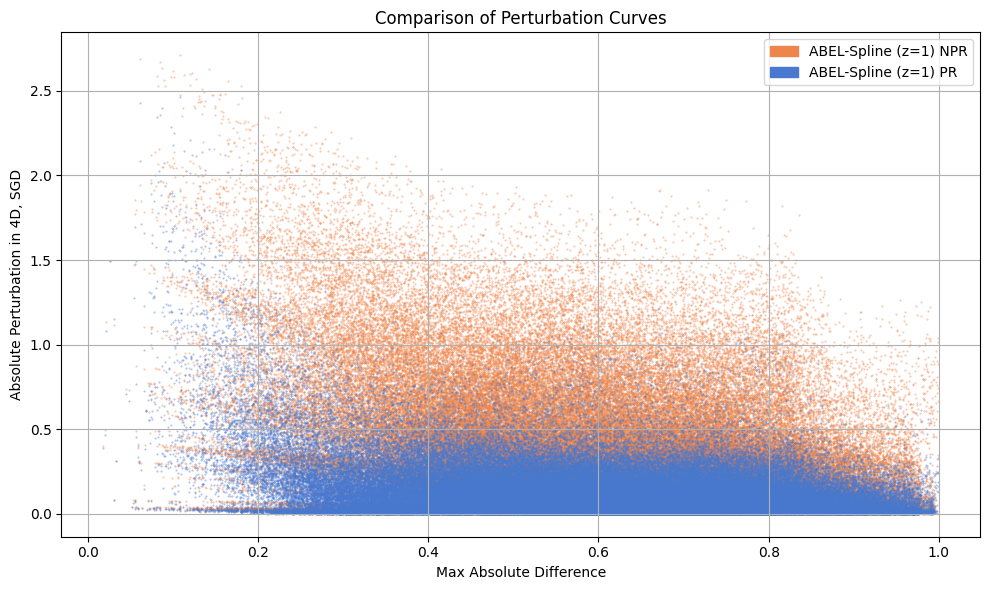

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

from typing import List, Union, Optional, Tuple

def generate_selections(optimizer_choices: Optional[Union[List[str], str]] = None,
                        pseudo_rehears_choices: Optional[Union[List[bool], bool]] = None,
                        dimension_choices: Optional[Union[List[int], int]] = None,
                        distance_choices: Optional[Union[List[int], int]] = None,
                        model_choices: Optional[Union[List[int], int]] = None
                       ) -> List[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A list of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # Assign default values if None is passed
    if optimizer_choices is None:
        optimizer_choices = ['adam', 'sgd']
    if pseudo_rehears_choices is None:
        pseudo_rehears_choices = [True, False]
    if dimension_choices is None:
        dimension_choices = list(range(1, 4))  # Example range
    if distance_choices is None:
        distance_choices = [0, 1]
    if model_choices is None:
        model_choices = list(range(0, 20))  # Example range
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = []
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combo = (optimizer, pseudo, dimension, distance, model)
                        if combo not in combinations:
                            combinations.append(combo)
                        
    return combinations

def multi_scatterplot(df_dict: dict, selections: list) -> None:
    """
    Plot multiple scatter plots on the same axes for comparison.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - selections (list): A list of selection tuples. Each tuple should have the following format:
        (optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice)
    """
    plt.figure(figsize=(10, 6))
    labels = get_perturbation_labels()

    # Check if all selections have the same parameter
    def all_same_for_param(param_idx):
        return len(set([sel[param_idx] for sel in selections])) == 1

    # Deduce common parameters
    common_optimizer = all_same_for_param(0)
    common_pseudo_rehears = all_same_for_param(1)
    common_dimension = all_same_for_param(2)
    common_model = all_same_for_param(4)

    # Create the y-label based on common parameters
    ylabel = "Absolute Perturbation"
    #if common_model:
    #    ylabel += f" {labels[f'model_{selections[0][4]}_perturbations']}"
    if common_dimension:
        ylabel += f" in {selections[0][2]}D"
    if common_pseudo_rehears:
        ylabel += " with PR" if selections[0][1] else " with NPR"
    if common_optimizer:
        ylabel += f", {selections[0][0].upper()}"

    # Get colors from the muted Seaborn palette
    colors = sns.color_palette("muted", len(selections))
    
    # Using reversed for z-order and manual legend handling
    legend_handles = []
    
    for idx, sel in reversed(list(enumerate(selections))):
        optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice = sel
        distance_key = ['min_distance', 'max_distance'][distance_choice]
        specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
        model_key = f'model_{model_choice}_perturbations'
        
        plt.scatter(specific_df[distance_key], 
                    specific_df[model_key], 
                    c=colors[idx], 
                    s=0.2,
                    alpha=0.5)
        
        # Generate legend label by appending non-common parameters
        legend_label = labels[model_key]
        if not common_dimension:
            legend_label += f" {dimension_choice}D"
        if not common_pseudo_rehears:
            legend_label += " PR" if pseudo_rehears_choice else " NPR"
        if not common_optimizer:
            legend_label += f" {optimizer_choice.upper()}"

        # Create legend handles
        legend_handles.append(Patch(color=colors[idx], label=legend_label))

    plt.title('Comparison of Perturbation Curves')
    plt.ylabel(ylabel)
    plt.xlabel(f'{labels[distance_key]}')
    plt.legend(handles=legend_handles)  # Using custom legend
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
selections = [
    ('sgd', True, 4, 1, 6),
    ('sgd', False, 4, 1, 6)]

multi_scatterplot(df_dict, selections)


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_10160\2709433343.py:109: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


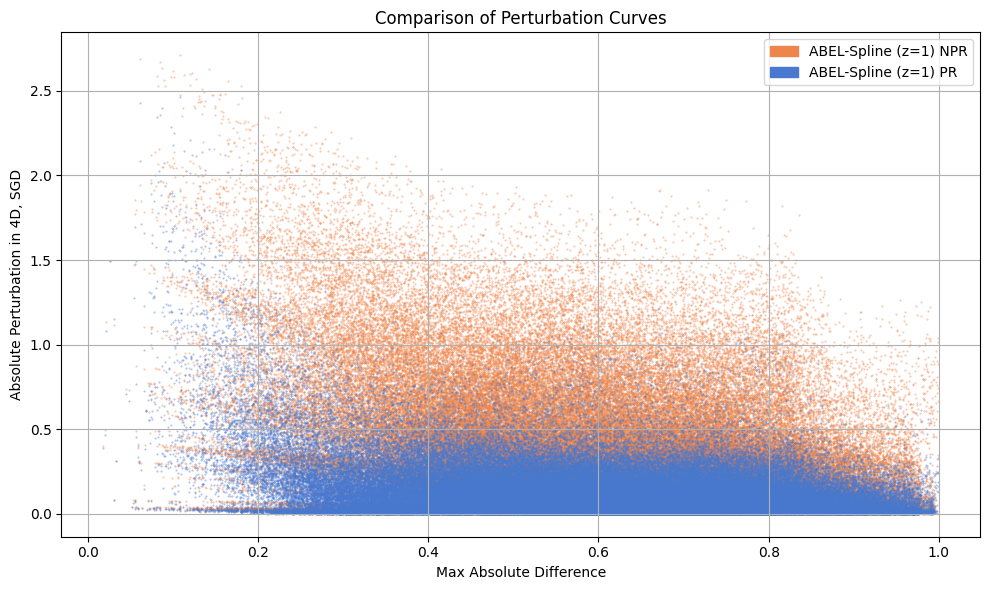

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

from typing import List, Union, Optional, Tuple

def generate_selections(optimizer_choices: Optional[Union[List[str], str]] = None,
                        pseudo_rehears_choices: Optional[Union[List[bool], bool]] = None,
                        dimension_choices: Optional[Union[List[int], int]] = None,
                        distance_choices: Optional[Union[List[int], int]] = None,
                        model_choices: Optional[Union[List[int], int]] = None
                       ) -> List[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A list of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # Assign default values if None is passed
    if optimizer_choices is None:
        optimizer_choices = ['adam', 'sgd']
    if pseudo_rehears_choices is None:
        pseudo_rehears_choices = [True, False]
    if dimension_choices is None:
        dimension_choices = list(range(1, 4))  # Example range
    if distance_choices is None:
        distance_choices = [0, 1]
    if model_choices is None:
        model_choices = list(range(0, 20))  # Example range
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = []
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combo = (optimizer, pseudo, dimension, distance, model)
                        if combo not in combinations:
                            combinations.append(combo)
                        
    return combinations

def multi_scatterplot(df_dict: dict, selections: list) -> None:
    """
    Plot multiple scatter plots on the same axes for comparison.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - selections (list): A list of selection tuples. Each tuple should have the following format:
        (optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice)
    """
    plt.figure(figsize=(10, 6))
    labels = get_perturbation_labels()

    # Check if all selections have the same parameter
    def all_same_for_param(param_idx):
        return len(set([sel[param_idx] for sel in selections])) == 1

    # Deduce common parameters
    common_optimizer = all_same_for_param(0)
    common_pseudo_rehears = all_same_for_param(1)
    common_dimension = all_same_for_param(2)
    common_model = all_same_for_param(4)

    # Create the y-label based on common parameters
    ylabel = "Absolute Perturbation"
    #if common_model:
    #    ylabel += f" {labels[f'model_{selections[0][4]}_perturbations']}"
    if common_dimension:
        ylabel += f" in {selections[0][2]}D"
    if common_pseudo_rehears:
        ylabel += " with PR" if selections[0][1] else " with NPR"
    if common_optimizer:
        ylabel += f", {selections[0][0].upper()}"

    # Get colors from the muted Seaborn palette
    colors = sns.color_palette("muted", len(selections))
    
    # Using reversed for z-order and manual legend handling
    legend_handles = []
    
    for idx, sel in reversed(list(enumerate(selections))):
        optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice = sel
        distance_key = ['min_distance', 'max_distance'][distance_choice]
        specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
        model_key = f'model_{model_choice}_perturbations'
        
        plt.scatter(specific_df[distance_key], 
                    specific_df[model_key], 
                    c=colors[idx], 
                    s=0.2,
                    alpha=0.5)
        
        # Generate legend label by appending non-common parameters
        legend_label = labels[model_key]
        if not common_dimension:
            legend_label += f" {dimension_choice}D"
        if not common_pseudo_rehears:
            legend_label += " PR" if pseudo_rehears_choice else " NPR"
        if not common_optimizer:
            legend_label += f" {optimizer_choice.upper()}"

        # Create legend handles
        legend_handles.append(Patch(color=colors[idx], label=legend_label))

    plt.title('Comparison of Perturbation Curves')
    plt.ylabel(ylabel)
    plt.xlabel(f'{labels[distance_key]}')
    plt.legend(handles=legend_handles)  # Using custom legend
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
selections = [
    ('sgd', True, 4, 1, 6),
    ('sgd', False, 4, 1, 6)]

multi_scatterplot(df_dict, selections)


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_10160\1321163149.py:109: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


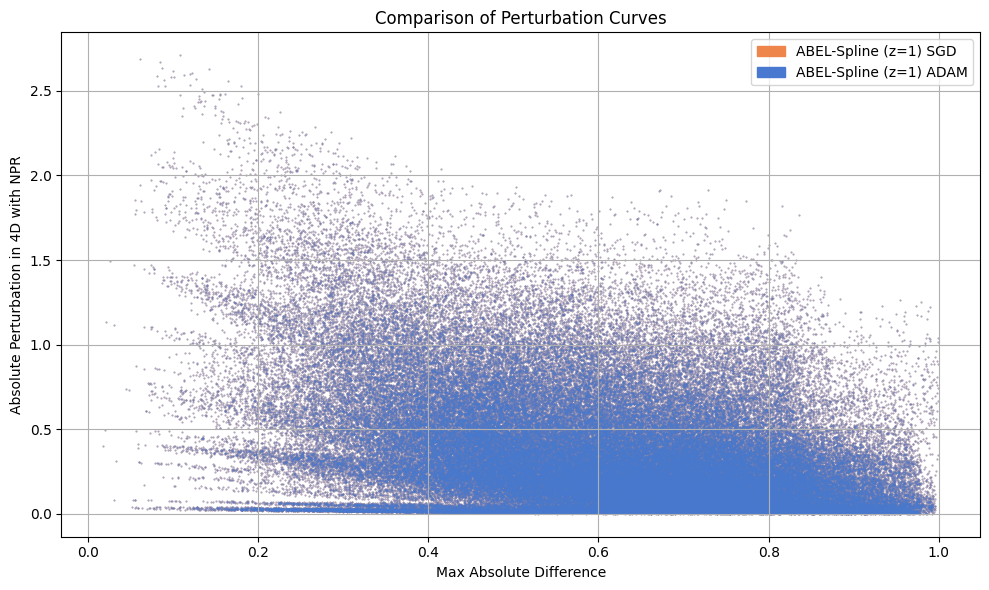

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

from typing import List, Union, Optional, Tuple

def generate_selections(optimizer_choices: Optional[Union[List[str], str]] = None,
                        pseudo_rehears_choices: Optional[Union[List[bool], bool]] = None,
                        dimension_choices: Optional[Union[List[int], int]] = None,
                        distance_choices: Optional[Union[List[int], int]] = None,
                        model_choices: Optional[Union[List[int], int]] = None
                       ) -> List[Tuple[str, bool, int, int, int]]:
    """
    Generate combinations of selections based on the parameters provided.
    
    Parameters:
    - optimizer_choices: List of optimizer strings or a single optimizer string. Default is ['adam', 'sgd'].
    - pseudo_rehears_choices: List of boolean values or a single boolean. Default is [True, False].
    - dimension_choices: List of integers or a single integer. Default is a range from 1 to 3 (inclusive).
    - distance_choices: List of integers (0 or 1) or a single integer. Default is [0, 1].
    - model_choices: List of integers or a single integer. Default is a range from 0 to 19 (inclusive).
    
    Returns:
    - A list of tuples, where each tuple is a unique combination of the parameters.
    """
    
    # Assign default values if None is passed
    if optimizer_choices is None:
        optimizer_choices = ['adam', 'sgd']
    if pseudo_rehears_choices is None:
        pseudo_rehears_choices = [True, False]
    if dimension_choices is None:
        dimension_choices = list(range(1, 4))  # Example range
    if distance_choices is None:
        distance_choices = [0, 1]
    if model_choices is None:
        model_choices = list(range(0, 20))  # Example range
    
    # If single values are provided, convert them to lists
    if not isinstance(optimizer_choices, list):
        optimizer_choices = [optimizer_choices]
    if not isinstance(pseudo_rehears_choices, list):
        pseudo_rehears_choices = [pseudo_rehears_choices]
    if not isinstance(dimension_choices, list):
        dimension_choices = [dimension_choices]
    if not isinstance(distance_choices, list):
        distance_choices = [distance_choices]
    if not isinstance(model_choices, list):
        model_choices = [model_choices]
    
    # Generate combinations using nested loops
    combinations = []
    for optimizer in optimizer_choices:
        for pseudo in pseudo_rehears_choices:
            for dimension in dimension_choices:
                for distance in distance_choices:
                    for model in model_choices:
                        combo = (optimizer, pseudo, dimension, distance, model)
                        if combo not in combinations:
                            combinations.append(combo)
                        
    return combinations

def multi_scatterplot(df_dict: dict, selections: list) -> None:
    """
    Plot multiple scatter plots on the same axes for comparison.

    Parameters:
    - df_dict (dict): Nested dictionary of dataframes.
    - selections (list): A list of selection tuples. Each tuple should have the following format:
        (optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice)
    """
    plt.figure(figsize=(10, 6))
    labels = get_perturbation_labels()

    # Check if all selections have the same parameter
    def all_same_for_param(param_idx):
        return len(set([sel[param_idx] for sel in selections])) == 1

    # Deduce common parameters
    common_optimizer = all_same_for_param(0)
    common_pseudo_rehears = all_same_for_param(1)
    common_dimension = all_same_for_param(2)
    common_model = all_same_for_param(4)

    # Create the y-label based on common parameters
    ylabel = "Absolute Perturbation"
    #if common_model:
    #    ylabel += f" {labels[f'model_{selections[0][4]}_perturbations']}"
    if common_dimension:
        ylabel += f" in {selections[0][2]}D"
    if common_pseudo_rehears:
        ylabel += " with PR" if selections[0][1] else " with NPR"
    if common_optimizer:
        ylabel += f", {selections[0][0].upper()}"

    # Get colors from the muted Seaborn palette
    colors = sns.color_palette("muted", len(selections))
    
    # Using reversed for z-order and manual legend handling
    legend_handles = []
    
    for idx, sel in reversed(list(enumerate(selections))):
        optimizer_choice, pseudo_rehears_choice, dimension_choice, distance_choice, model_choice = sel
        distance_key = ['min_distance', 'max_distance'][distance_choice]
        specific_df = df_dict[dimension_choice][pseudo_rehears_choice][optimizer_choice]
        model_key = f'model_{model_choice}_perturbations'
        
        plt.scatter(specific_df[distance_key], 
                    specific_df[model_key], 
                    c=colors[idx], 
                    s=0.2,
                    alpha=0.5)
        
        # Generate legend label by appending non-common parameters
        legend_label = labels[model_key]
        if not common_dimension:
            legend_label += f" {dimension_choice}D"
        if not common_pseudo_rehears:
            legend_label += " PR" if pseudo_rehears_choice else " NPR"
        if not common_optimizer:
            legend_label += f" {optimizer_choice.upper()}"

        # Create legend handles
        legend_handles.append(Patch(color=colors[idx], label=legend_label))

    plt.title('Comparison of Perturbation Curves')
    plt.ylabel(ylabel)
    plt.xlabel(f'{labels[distance_key]}')
    plt.legend(handles=legend_handles)  # Using custom legend
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
selections = [
    ('adam', False, 4, 1, 6),
    ('sgd', False, 4, 1, 6)]

multi_scatterplot(df_dict, selections)


[('adam', False, 2, 0, 10), ('adam', False, 3, 0, 10), ('adam', False, 4, 0, 10)]


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_10160\2709433343.py:109: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


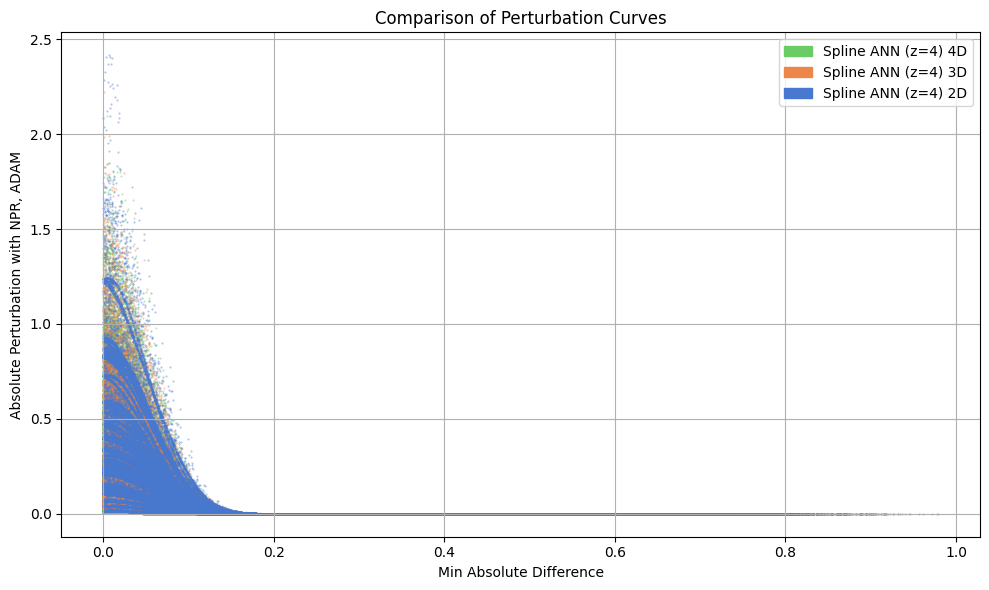

In [30]:
# Example Usage:
selections = generate_selections(optimizer_choices=['adam'], 
                                              pseudo_rehears_choices=False, 
                                              dimension_choices=[2,3,4], 
                                              distance_choices=0, 
                                              model_choices=10)

print(selections)

multi_scatterplot(df_dict, selections)

[('adam', True, 1, 0, 0), ('sgd', True, 1, 0, 0)]


C:\Users\Heinrich\AppData\Local\Temp\ipykernel_10160\2709433343.py:109: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(specific_df[distance_key],


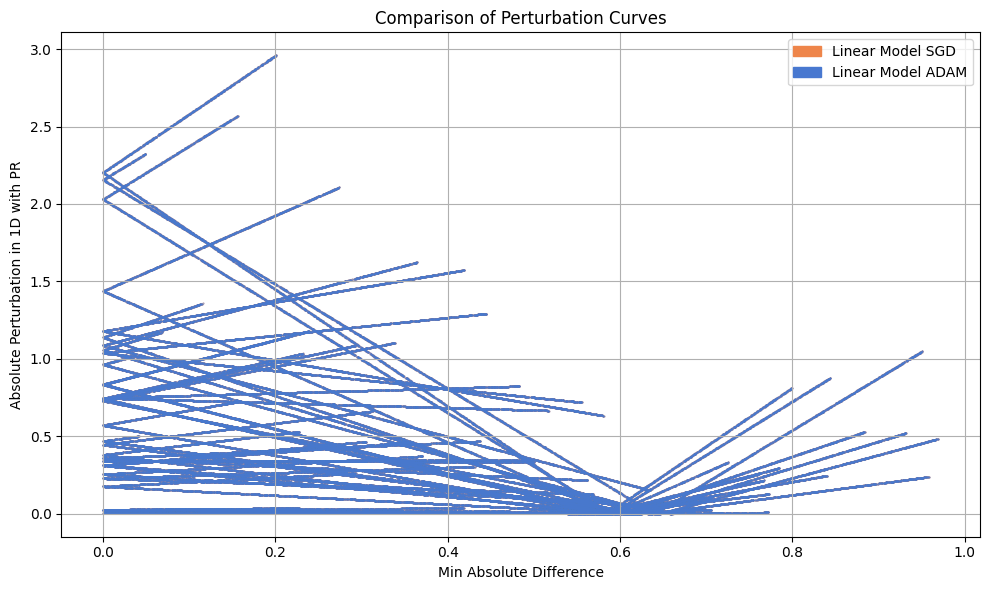

In [31]:
# Example Usage:
selections = generate_selections(optimizer_choices=['adam','sgd'], 
                                              pseudo_rehears_choices=[True], 
                                              dimension_choices=[1], 
                                              distance_choices=0, 
                                              model_choices=[0])

print(selections)

multi_scatterplot(df_dict, selections)